# Model Building

## Imports

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import PredefinedSplit
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Data Loading

In [4]:
df_train = pd.read_csv('../data/US_youtube_trending_train_20231204.csv')
df_test = pd.read_csv('../data/US_youtube_trending_test_20231204.csv')
df_val = pd.read_csv('../data/US_youtube_trending_validation_20231204.csv')

In [7]:
df_val

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,top3_contains_orange,top3_contains_yellow,top3_contains_green,top3_contains_blue,top3_contains_purple,top3_contains_pink,top3_contains_brown,top3_contains_grey,top3_contains_black,top3_contains_white
0,6qAnYVYCqAg,Canada vs. USA - 2023 World Juniors Highlights,2023-01-04 21:19:24-08:00,UC--i2rV5NCxiEIPefr3l-zQ,TSN,17,2023-01-06 00:00:00+00:00,canada|usa|canada vs usa|shane wright|clarke|c...,775426,8275,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,6qAnYVYCqAg,Canada vs. USA - 2023 World Juniors Highlights,2023-01-04 21:19:24-08:00,UC--i2rV5NCxiEIPefr3l-zQ,TSN,17,2023-01-07 00:00:00+00:00,canada|usa|canada vs usa|shane wright|clarke|c...,826568,8539,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,6qAnYVYCqAg,Canada vs. USA - 2023 World Juniors Highlights,2023-01-04 21:19:24-08:00,UC--i2rV5NCxiEIPefr3l-zQ,TSN,17,2023-01-08 00:00:00+00:00,canada|usa|canada vs usa|shane wright|clarke|c...,840876,8645,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,6qAnYVYCqAg,Canada vs. USA - 2023 World Juniors Highlights,2023-01-04 21:19:24-08:00,UC--i2rV5NCxiEIPefr3l-zQ,TSN,17,2023-01-09 00:00:00+00:00,canada|usa|canada vs usa|shane wright|clarke|c...,850165,8712,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,6qAnYVYCqAg,Canada vs. USA - 2023 World Juniors Highlights,2023-01-04 21:19:24-08:00,UC--i2rV5NCxiEIPefr3l-zQ,TSN,17,2023-01-10 00:00:00+00:00,canada|usa|canada vs usa|shane wright|clarke|c...,854697,8742,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29750,MRrvfInQ6EA,I Bought VIRAL Youtuber Products *worth the $$...,2023-01-06 13:30:05-08:00,UCzzOKT1SkE7qdycJvPCR3Gg,Mia Maples,26,2023-01-09 00:00:00+00:00,mia maples|tiktok|Charlie damelio|Addison rae|...,695048,36526,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
29751,MRrvfInQ6EA,I Bought VIRAL Youtuber Products *worth the $$...,2023-01-06 13:30:05-08:00,UCzzOKT1SkE7qdycJvPCR3Gg,Mia Maples,26,2023-01-10 00:00:00+00:00,mia maples|tiktok|Charlie damelio|Addison rae|...,754403,39973,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
29752,MRrvfInQ6EA,I Bought VIRAL Youtuber Products *worth the $$...,2023-01-06 13:30:05-08:00,UCzzOKT1SkE7qdycJvPCR3Gg,Mia Maples,26,2023-01-11 00:00:00+00:00,mia maples|tiktok|Charlie damelio|Addison rae|...,809178,42101,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
29753,MRrvfInQ6EA,I Bought VIRAL Youtuber Products *worth the $$...,2023-01-06 13:30:05-08:00,UCzzOKT1SkE7qdycJvPCR3Gg,Mia Maples,26,2023-01-12 00:00:00+00:00,mia maples|tiktok|Charlie damelio|Addison rae|...,881228,43466,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [3]:
df_train['face_detected'] = df_train['Face Detected'].astype('bool')
df_train['text_detected'] = df_train['Text Detected'].astype('bool')
df_train.rename({"Color Palette": "color_palette"}, axis = 1, inplace = True)

df_test['face_detected'] = df_test['Face Detected'].astype('bool')
df_test['text_detected'] = df_test['Text Detected'].astype('bool')
df_test.rename({"Color Palette": "color_palette"}, axis = 1, inplace = True)

df_val['face_detected'] = df_val['Face Detected'].astype('bool')
df_val['text_detected'] = df_val['Text Detected'].astype('bool')
df_val.rename({"Color Palette": "color_palette"}, axis = 1, inplace = True)

In [4]:
df_val.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       ...
       'top3_contains_green', 'top3_contains_blue', 'top3_contains_purple',
       'top3_contains_pink', 'top3_contains_brown', 'top3_contains_grey',
       'top3_contains_black', 'top3_contains_white', 'face_detected',
       'text_detected'],
      dtype='object', length=107)

## Selecting Columns

In [5]:
cols = [
    # target
    'view_count',

    # days since published
    'days_since_published',
    
    # thumbails
    'Brightness', 'Saturation', 'Contrast', 'color_palette',
    'top3_contains_black', 'top3_contains_blue', 'top3_contains_brown', 'top3_contains_green', 
    'top3_contains_grey', 'top3_contains_yellow', 'top3_contains_orange', 'top3_contains_pink', 
    'top3_contains_purple', 'top3_contains_red', 'top3_contains_white', 
    'text_detected', 'face_detected',
    
    # last video
    'last_video_log_comment_count', 'last_video_log_days_on_trending', 'last_video_log_dislikes', 'last_video_log_likes', 'last_video_log_views',
    
    # metdata
    'categoryId', 'comments_disabled', 'ratings_disabled', 
    
    # publish time
    'hour_of_day_published',  'time_of_day_published',
    'day_of_week_published', 'is_weekend_published', 'published_on_holiday',
    
    # previous year
    'previous_365_days_log_avg_comment_count', 'previous_365_days_log_avg_dislikes', 'previous_365_days_log_avg_likes', 
    'previous_365_days_log_avg_views', 'previous_365_days_log_videos_count', 'previous_365_days_log_avg_days_on_trending',

    # title
    'title_length_chars', 'title_length_words', 'title_avg_word_length', 'title_longest_word_length', 
    'title_all_upcase', 'title_first_upcase', 'title_any_upcase', 'title_prop_upcase', 'title_all_lowercase', 
    'title_sentiment', 
    'title_contains_digit', 'title_starts_digit', 
    'title_contains_question', 'title_contains_quote', 
    'title_exclamation_count', 'title_punctuation_count',
    'title_stop_words_count', 'title_stop_words_prop',

    # keywords
    'trailer', 'shorts', 'full', 'official', 'video', '100', '1', 'music', 'world', 
    '2022', 'highlights', 'vs', 'day', 'ft', 'game', 'nba', 'how'
]

In [6]:
set(df_train.columns) - set(cols)

{'Face Detected',
 'Text Detected',
 'channelId',
 'channelTitle',
 'comment_count',
 'days_on_trending',
 'description',
 'dislikes',
 'dislikes_scaled',
 'hour_published_normalized',
 'is_weekend_trending',
 'last_video_comment_count',
 'last_video_days_on_trending',
 'last_video_dislikes',
 'last_video_likes',
 'last_video_views',
 'likes',
 'likes_scaled',
 'previous_365_days_avg_comment_count',
 'previous_365_days_avg_days_on_trending',
 'previous_365_days_avg_dislikes',
 'previous_365_days_avg_likes',
 'previous_365_days_avg_views',
 'previous_365_days_geo_avg_like_dislike_ratio',
 'previous_365_days_videos_count',
 'previous_avg_days_on_trending',
 'publishedAt',
 'tags',
 'thumbnail_link',
 'title',
 'trending_date',
 'trending_day_of_week',
 'video_id',
 'view_count_scaled'}

In [7]:
df_train = df_train[cols]
df_test = df_test[cols]
df_val = df_val[cols]

## Handle NaN

In [8]:
(df_train[cols].isna().sum() / len(df_train)).sort_values(ascending = False).head(10)

previous_365_days_log_avg_views               0.169627
previous_365_days_log_avg_comment_count       0.169627
previous_365_days_log_avg_dislikes            0.169627
last_video_log_views                          0.169627
last_video_log_likes                          0.169627
last_video_log_dislikes                       0.169627
last_video_log_days_on_trending               0.169627
last_video_log_comment_count                  0.169627
previous_365_days_log_avg_days_on_trending    0.169627
previous_365_days_log_avg_likes               0.169627
dtype: float64

In [9]:
df_train = df_train.fillna(0)
df_test = df_test.fillna(0)
df_val = df_val.fillna(0)

## One-hot Encoding

In [10]:
cols_dtypes = df_train[cols].dtypes
dummy_cols = cols_dtypes[cols_dtypes == "object"].index
dummy_cols

Index(['color_palette', 'time_of_day_published', 'day_of_week_published'], dtype='object')

In [11]:
def map_color(color, target_color, assigned_color):
    if isinstance(color, str):
        return assigned_color if target_color in color.lower() else color
    else:
        return 'unknown'

def change_color(df_train):

    df_train['color_palette'] = df_train['color_palette'].apply(lambda x: map_color(x, "blue", "blue"))
    df_train['color_palette'] = df_train['color_palette'].apply(lambda x: map_color(x, "teal", "blue"))
    df_train['color_palette'] = df_train['color_palette'].apply(lambda x: map_color(x, "cyan", "blue"))
    df_train['color_palette'] = df_train['color_palette'].apply(lambda x: map_color(x, "turquoise", "blue"))
    df_train['color_palette'] = df_train['color_palette'].apply(lambda x: map_color(x, "aqua", "blue"))
    
    df_train['color_palette'] = df_train['color_palette'].apply(lambda x: map_color(x, "pink", "pink"))
    df_train['color_palette'] = df_train['color_palette'].apply(lambda x: map_color(x, "mistyrose", "pink"))
    df_train['color_palette'] = df_train['color_palette'].apply(lambda x: map_color(x, "seashell", "pink"))
    df_train['color_palette'] = df_train['color_palette'].apply(lambda x: map_color(x, "peachpuff", "pink"))
    df_train['color_palette'] = df_train['color_palette'].apply(lambda x: map_color(x, "magenta", "pink"))
    df_train['color_palette'] = df_train['color_palette'].apply(lambda x: map_color(x, "salmon", "pink"))
    df_train['color_palette'] = df_train['color_palette'].apply(lambda x: map_color(x, "coral", "pink"))
    
    df_train['color_palette'] = df_train['color_palette'].apply(lambda x: map_color(x, "green", "green"))
    df_train['color_palette'] = df_train['color_palette'].apply(lambda x: map_color(x, "olive", "green"))
    df_train['color_palette'] = df_train['color_palette'].apply(lambda x: map_color(x, "lime", "green"))
    
    df_train['color_palette'] = df_train['color_palette'].apply(lambda x: map_color(x, "red", "red"))
    df_train['color_palette'] = df_train['color_palette'].apply(lambda x: map_color(x, "crimson", "red"))
    df_train['color_palette'] = df_train['color_palette'].apply(lambda x: map_color(x, "firebrick", "red"))
    
    df_train['color_palette'] = df_train['color_palette'].apply(lambda x: map_color(x, "gray", "gray"))
    df_train['color_palette'] = df_train['color_palette'].apply(lambda x: map_color(x, "gainsboro", "gray"))
    
    df_train['color_palette'] = df_train['color_palette'].apply(lambda x: map_color(x, "brown", "brown"))
    df_train['color_palette'] = df_train['color_palette'].apply(lambda x: map_color(x, "khaki", "brown"))
    df_train['color_palette'] = df_train['color_palette'].apply(lambda x: map_color(x, "burlywood", "brown"))
    df_train['color_palette'] = df_train['color_palette'].apply(lambda x: map_color(x, "tan", "brown"))
    df_train['color_palette'] = df_train['color_palette'].apply(lambda x: map_color(x, "chocolate", "brown"))
    df_train['color_palette'] = df_train['color_palette'].apply(lambda x: map_color(x, "peru", "brown"))
    df_train['color_palette'] = df_train['color_palette'].apply(lambda x: map_color(x, "sienna", "brown"))
    
    df_train['color_palette'] = df_train['color_palette'].apply(lambda x: map_color(x, "white", "white"))
    
    df_train['color_palette'] = df_train['color_palette'].apply(lambda x: map_color(x, "beige", "cream"))
    df_train['color_palette'] = df_train['color_palette'].apply(lambda x: map_color(x, "cream", "cream"))
    df_train['color_palette'] = df_train['color_palette'].apply(lambda x: map_color(x, "wheat", "cream"))
    df_train['color_palette'] = df_train['color_palette'].apply(lambda x: map_color(x, "snow", "cream"))
    df_train['color_palette'] = df_train['color_palette'].apply(lambda x: map_color(x, "linen", "cream"))
    df_train['color_palette'] = df_train['color_palette'].apply(lambda x: map_color(x, "bisque", "cream"))
    df_train['color_palette'] = df_train['color_palette'].apply(lambda x: map_color(x, "oldlace", "cream"))
    df_train['color_palette'] = df_train['color_palette'].apply(lambda x: map_color(x, "blanchedalmond", "cream"))
    
    df_train['color_palette'] = df_train['color_palette'].apply(lambda x: map_color(x, "purple", "purple"))
    df_train['color_palette'] = df_train['color_palette'].apply(lambda x: map_color(x, "violet", "purple"))
    df_train['color_palette'] = df_train['color_palette'].apply(lambda x: map_color(x, "orchid", "purple"))
    df_train['color_palette'] = df_train['color_palette'].apply(lambda x: map_color(x, "thistle", "purple"))
    df_train['color_palette'] = df_train['color_palette'].apply(lambda x: map_color(x, "lavender", "purple"))
    df_train['color_palette'] = df_train['color_palette'].apply(lambda x: map_color(x, "plum", "purple"))
    df_train['color_palette'] = df_train['color_palette'].apply(lambda x: map_color(x, "indigo", "purple"))
    
    df_train['color_palette'] = df_train['color_palette'].apply(lambda x: map_color(x, "gold", "gold"))
    
    df_train['color_palette'] = df_train['color_palette'].apply(lambda x: map_color(x, "orange", "orange"))

    df_train['color_palette'] = df_train['color_palette'].apply(lambda x: map_color(x, "yellow", "yellow"))

    return df_train

In [12]:
# df_train = change_color(df_train)
# df_test = change_color(df_test)
# df_val = change_color(df_val)

In [13]:
all_categories = set(df_train['color_palette'].unique()) | set(df_test['color_palette'].unique()) | set(df_val['color_palette'].unique())

category_mapping = {category: i for i, category in enumerate(all_categories)}

def create_dummies(df, category_mapping):
    dummies = pd.get_dummies(df['color_palette'])

    for category in category_mapping:
        if category not in dummies:
            dummies[category] = 0

    sorted_keys = sorted(category_mapping.keys(), key=str)
    dummies = dummies[sorted_keys]
    return dummies

train_dummies = create_dummies(df_train, category_mapping)
test_dummies = create_dummies(df_test, category_mapping)
validation_dummies = create_dummies(df_val, category_mapping)

df_train = df_train.drop('color_palette', axis = 1).join(train_dummies)
df_test = df_test.drop('color_palette', axis = 1).join(test_dummies)
df_val = df_val.drop('color_palette', axis = 1).join(validation_dummies)

In [14]:
dummy_cols = dummy_cols.delete(0)

In [15]:
df_train = pd.get_dummies(df_train, columns = dummy_cols)
df_test = pd.get_dummies(df_test, columns = dummy_cols)
df_val = pd.get_dummies(df_val, columns = dummy_cols)

In [16]:
categories = [24,  1, 26, 20, 28, 10, 27, 25, 22, 23,  2, 17, 15, 19, 29]
df_train['categoryId'] = pd.Categorical(df_train['categoryId'], categories = categories)
df_test['categoryId'] = pd.Categorical(df_test['categoryId'], categories = categories)
df_val['categoryId'] = pd.Categorical(df_val['categoryId'], categories = categories)

categories = [-1, 0, 1]
df_train['title_sentiment'] = pd.Categorical(df_train['title_sentiment'], categories = categories)
df_test['title_sentiment'] = pd.Categorical(df_test['title_sentiment'], categories = categories)
df_val['title_sentiment'] = pd.Categorical(df_val['title_sentiment'], categories = categories)

In [17]:
df_train = pd.get_dummies(df_train, columns = ['categoryId', 'title_sentiment'])
df_test = pd.get_dummies(df_test, columns = ['categoryId', 'title_sentiment'])
df_val = pd.get_dummies(df_val, columns = ['categoryId', 'title_sentiment'])

In [18]:
df_train = df_train.replace([np.inf, -np.inf], 0)
df_test = df_test.replace([np.inf, -np.inf], 0)
df_val = df_val.replace([np.inf, -np.inf], 0)

## Training

In [19]:
X_train = df_train.loc[:, df_train.columns != "view_count"]
y_train = df_train["view_count"]

X_test = df_test.loc[:, df_test.columns != "view_count"]
y_test = df_test["view_count"]

X_val = df_val.loc[:, df_val.columns != "view_count"]
y_val = df_val["view_count"]

In [20]:
X_train.to_csv('../data/train_xgb_best_20231204.csv', index = False)

In [20]:
test_fold = [-1 for _ in range(X_train.shape[0])] + [0 for _ in range(X_val.shape[0])]
ps = PredefinedSplit(test_fold)

X_combined = np.concatenate((X_train, X_val))
X_val.columns = X_val.columns.astype(str)
y_combined = np.concatenate((y_train, y_val))

### Random Forest

In [21]:
rf = RandomForestRegressor(random_state = 42)
rf_params = {'n_estimators': [50, 100, 200, 500], 'max_depth': [3, 6, 9, 12, 15]}
rf_gs = GridSearchCV(rf, rf_params, cv = ps, n_jobs = -1, verbose = 3)
rf_gs.fit(X_combined, y_combined)
rf_best = rf_gs.best_estimator_

Fitting 1 folds for each of 20 candidates, totalling 20 fits


### XGBoost

In [22]:
xgb = XGBRegressor(random_state = 42)
xgb_params = {'n_estimators': [50, 100, 200, 500, 1000], 'max_depth': [3, 5, 7, 9, 11, 13, 15], 'learning_rate': [0.1, 0.05, 0.025, 0.01]}
xgb_gs = GridSearchCV(xgb, xgb_params, cv = ps, n_jobs = -1, verbose = 3)
xgb_gs.fit(X_combined, y_combined)
xgb_best = xgb_gs.best_estimator_

Fitting 1 folds for each of 140 candidates, totalling 140 fits


### Lasso

In [23]:
lasso = Lasso()
lasso_params = {'alpha': [0.02, 0.024, 0.025, 0.026, 0.03]}

lasso_gs = GridSearchCV(lasso, lasso_params, cv = ps, n_jobs = -1, verbose = 3)
lasso_gs.fit(X_combined, y_combined)
lasso_best = lasso_gs.best_estimator_

Fitting 1 folds for each of 5 candidates, totalling 5 fits


C:\Users\Dilan\.julia\conda\3\x86_64\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.110e+18, tolerance: 5.239e+14
  model = cd_fast.enet_coordinate_descent(


### Ridge

In [24]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge_params = {'alpha': [200, 230, 250, 265, 270, 275, 290, 300, 500]}

ridge_gs = GridSearchCV(ridge, ridge_params, cv = ps, n_jobs = -1, verbose = 3)
ridge_gs.fit(X_combined, y_combined)
ridge_best = ridge_gs.best_estimator_

Fitting 1 folds for each of 9 candidates, totalling 9 fits


### CART

In [25]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_combined, y_combined)

DecisionTreeRegressor()

### Evaluation

In [26]:
models = [rf_best, xgb_best, lasso_best, ridge_best, dt]
for model in models:
    predictions = model.predict(X_test.to_numpy())
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f'Model: {model.__class__.__name__}, MAE: {mae}, MSE: {mse}, R2: {r2}')

Model: RandomForestRegressor, MAE: 1730125.4862771179, MSE: 35500908256376.74, R2: 0.7569214827304752
Model: XGBRegressor, MAE: 1749169.5709111004, MSE: 33254333960800.227, R2: 0.772304017305671
Model: Lasso, MAE: 3467372.3349966467, MSE: 112469629960824.17, R2: 0.22990840991177797
Model: Ridge, MAE: 3425879.20157538, MSE: 113175841753284.39, R2: 0.22507290220730536
Model: DecisionTreeRegressor, MAE: 2178699.2303966037, MSE: 52829330111734.87, R2: 0.6382719242233437


### Save Model

In [4]:
import pickle

In [30]:
with open('../data/xgb_best_20231204.pkl', 'wb') as out:
    pickle.dump(xgb_best, out, pickle.HIGHEST_PROTOCOL)

## Baselines

#### Baseline 1: Predicting Average Views

In [28]:
avg_views = y_train.mean()
y_baseline_1 = [avg_views] * len(y_test)

mae = mean_absolute_error(y_test, y_baseline_1)
mse = mean_squared_error(y_test, y_baseline_1)
r2 = r2_score(y_test, y_baseline_1)
print(f'Baseline 1, MAE: {mae}, MSE: {mse}, R2: {r2}')

Baseline 1, MAE: 3313987.7978648464, MSE: 147369363886259.94, R2: -0.009053802390834198


#### Baseline 2: Predicting Previous Video Views

In [29]:
y_baseline_2 = np.exp(X_test.last_video_log_views)

mae = mean_absolute_error(y_test, y_baseline_2)
mse = mean_squared_error(y_test, y_baseline_2)
r2 = r2_score(y_test, y_baseline_2)
print(f'Baseline 2, MAE: {mae}, MSE: {mse}, R2: {r2}')

Baseline 2, MAE: 2189878.8138176263, MSE: 57420777139887.71, R2: 0.6068337951573223


In [43]:
import matplotlib.pyplot as plt
import shap

In [2]:
X_train = pd.read_csv('../data/train_xgb_best_20231204.csv')

In [11]:
X_train.columns

Index(['days_since_published', 'Brightness', 'Saturation', 'Contrast',
       'top3_contains_black', 'top3_contains_blue', 'top3_contains_brown',
       'top3_contains_green', 'top3_contains_grey', 'top3_contains_yellow',
       ...
       'categoryId_22', 'categoryId_23', 'categoryId_2', 'categoryId_17',
       'categoryId_15', 'categoryId_19', 'categoryId_29', 'title_sentiment_-1',
       'title_sentiment_0', 'title_sentiment_1'],
      dtype='object', length=216)

In [9]:
with open('../data/xgb_best_20231204.pkl', 'rb') as f:
    xg_best = pickle.load(f)

[23:11:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


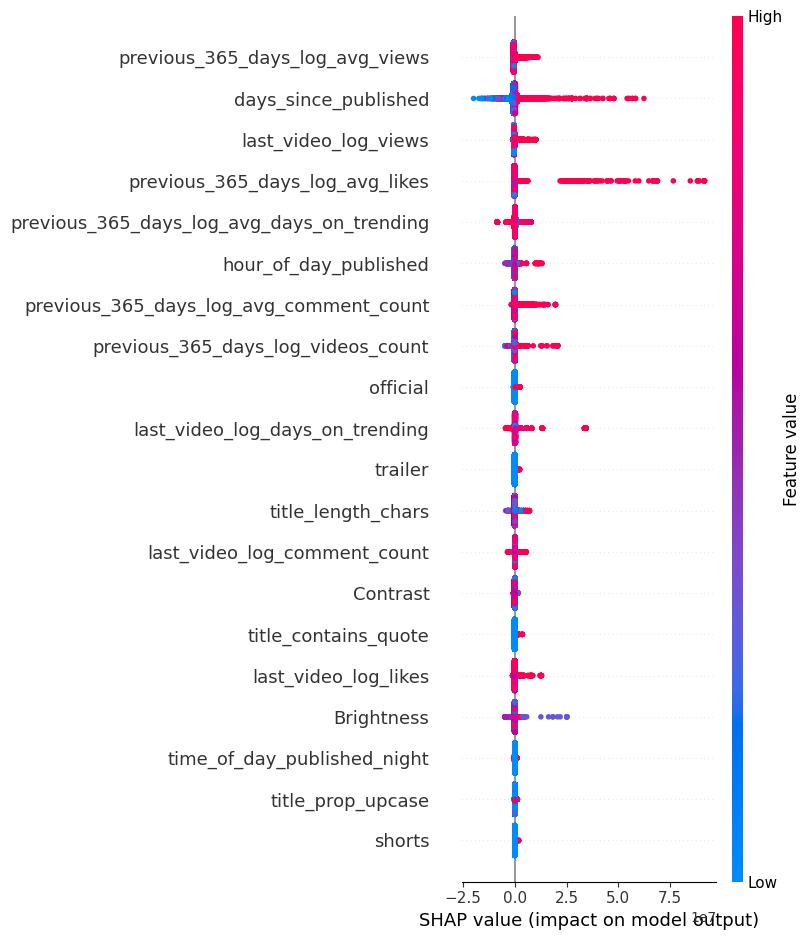

In [71]:
title = 'All'

filtered_df = X_train
explainer = shap.TreeExplainer(xg_best)
shap_values = explainer.shap_values(filtered_df)

shap.summary_plot(shap_values, filtered_df, show = False) 
plt.savefig(f'shap_summary_plot_{title.lower()}.png')

In [72]:
def plot_shap(id_var, title):

    filtered_df = X_train[X_train[id_var] == 1]
    explainer = shap.TreeExplainer(xg_best)
    shap_values = explainer.shap_values(filtered_df)
    
    shap.summary_plot(shap_values, filtered_df, show = False) 
    plt.savefig(f'shap_summary_plot_{title.lower()}.png')
    return

[23:12:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


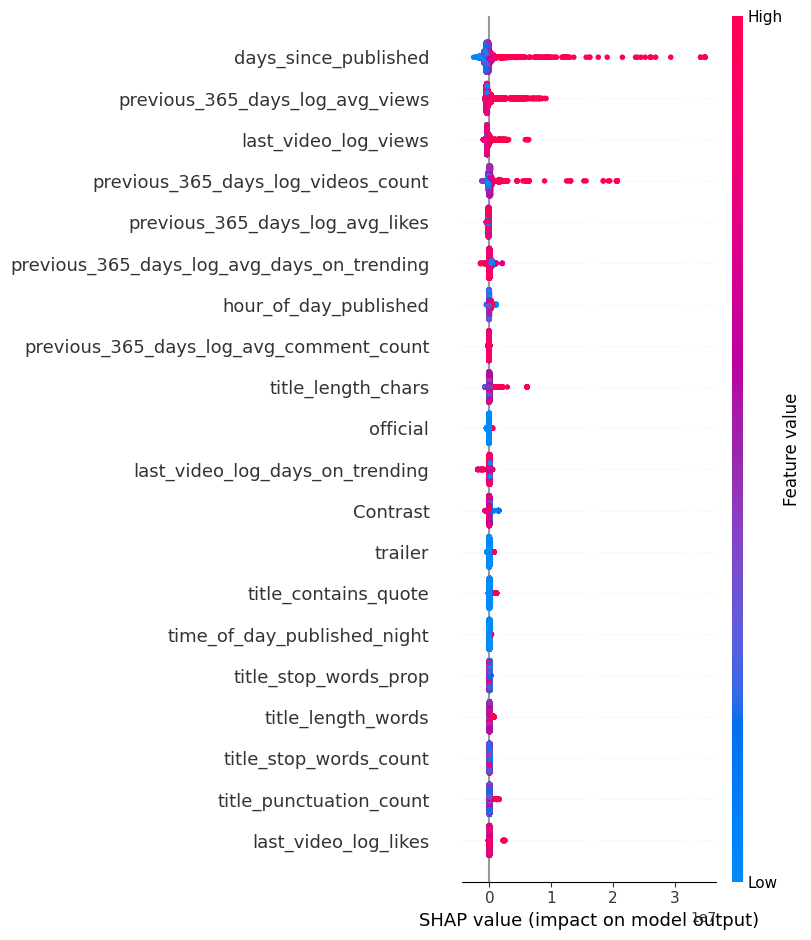

In [74]:
plot_shap('categoryId_17', 'Sports')

[23:12:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


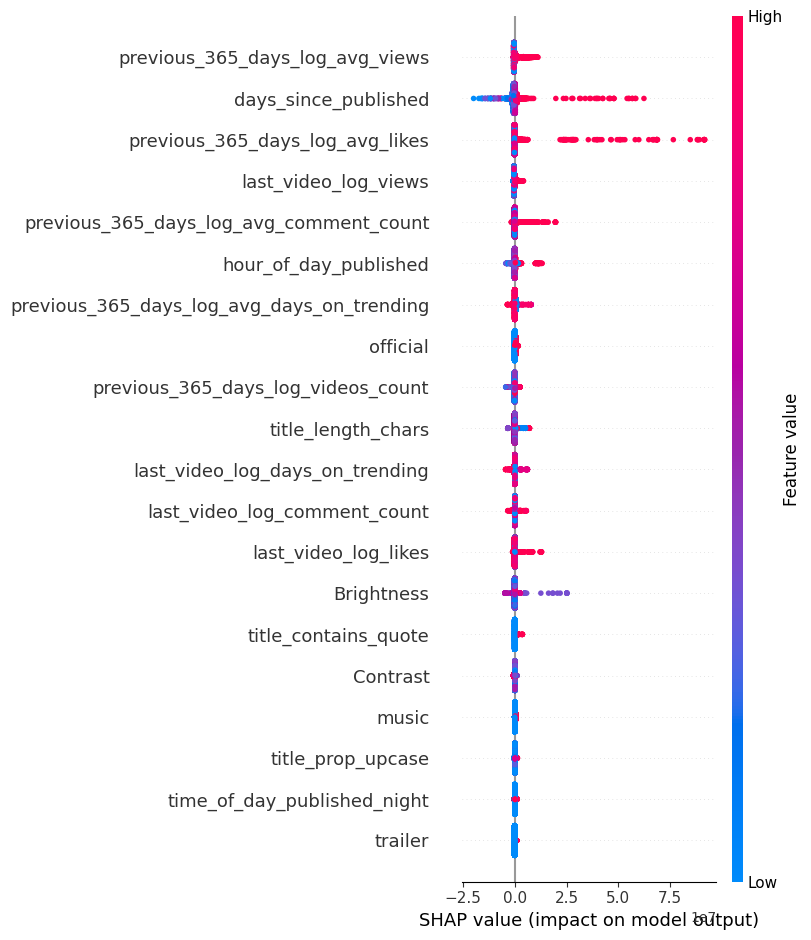

In [75]:
plot_shap('categoryId_10', 'Music')

[23:12:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


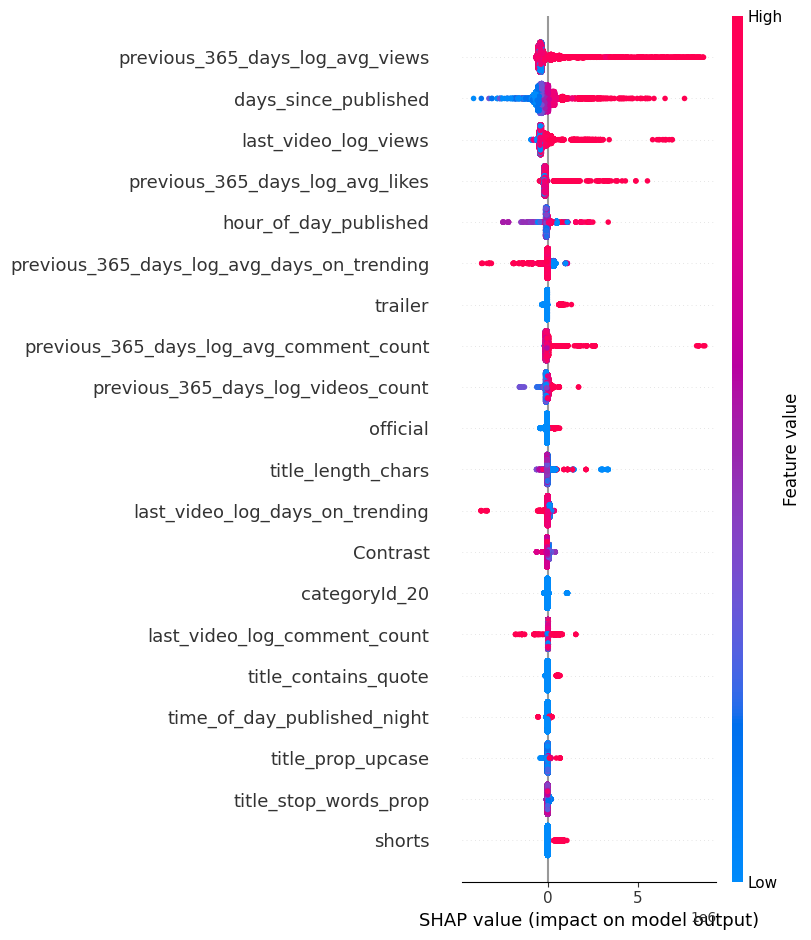

In [76]:
plot_shap('categoryId_20', 'Gaming')

[23:12:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


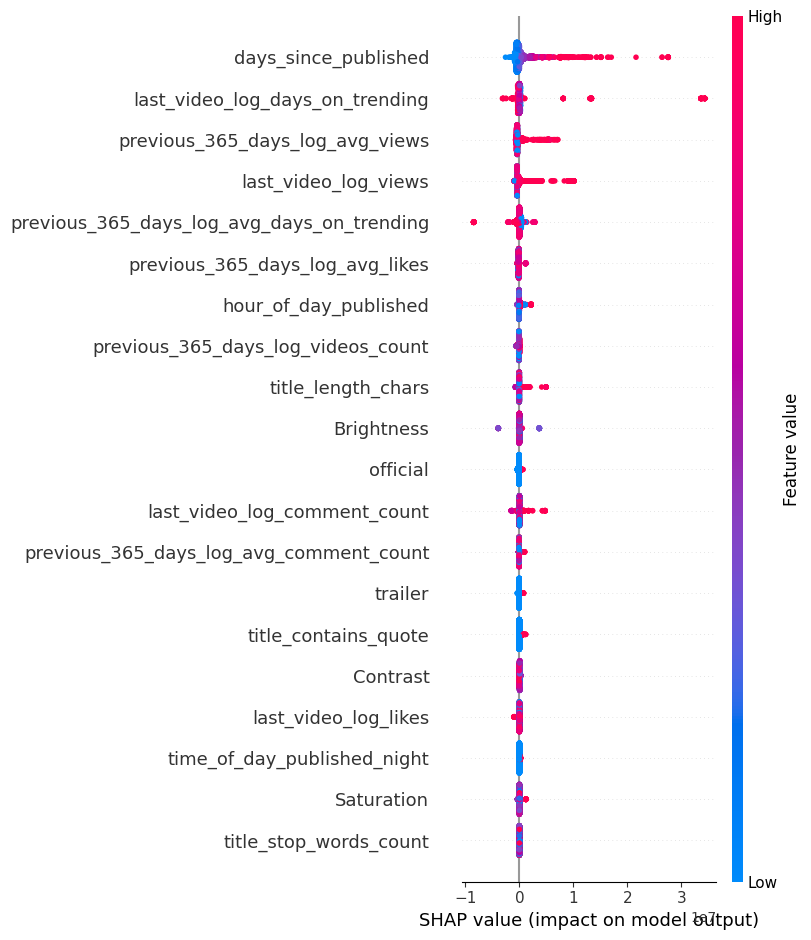

In [77]:
plot_shap('categoryId_25', 'News')

[23:12:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


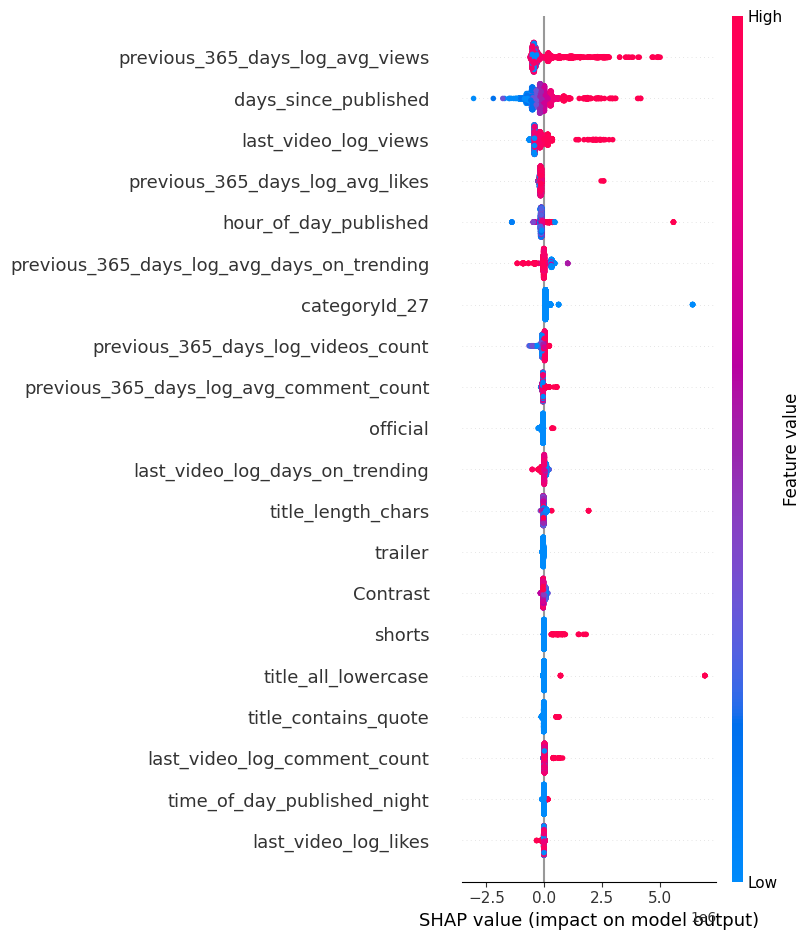

In [78]:
plot_shap('categoryId_27', 'Education')